<a href="https://colab.research.google.com/github/Sandeep2k4/Anarix-Sandeep/blob/main/Anarix_Sandeep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Cell 1: Environment Setup and Dependencies
# RetailPulse Analytics - Advanced Business Intelligence System

!pip install pandas google-generativeai sqlalchemy matplotlib seaborn plotly

import pandas as pd
import sqlite3
import google.generativeai as genai
import os
import matplotlib.pyplot as plt
import seaborn as sns
import io
import base64
from IPython.display import display, HTML
import warnings
import logging
import time
from datetime import datetime
from typing import List, Dict, Any, Optional, Tuple

# Configure display and warnings
warnings.filterwarnings("ignore", category=UserWarning)
plt.style.use('seaborn-v0_8')
logging.basicConfig(level=logging.INFO)

print("✅ RetailPulse Analytics Environment Initialized")
print("📊 Ready for business intelligence analysis")
print("=" * 50)

✅ RetailPulse Analytics Environment Initialized
📊 Ready for business intelligence analysis


In [2]:
# Cell 2: Data Loading and Validation
# RetailPulse Analytics - Data Ingestion Module

# Define data source paths
advertising_data_path = 'Product-Level Ad Sales and Metrics (mapped) - Product-Level Ad Sales and Metrics (mapped).csv'
revenue_data_path = 'Product-Level Total Sales and Metrics (mapped) - Product-Level Total Sales and Metrics (mapped).csv'
product_status_path = 'Product-Level Eligibility Table (mapped) - Product-Level Eligibility Table (mapped).csv'

# Initialize data containers
advertising_metrics = None
revenue_metrics = None
product_catalog = None

def load_business_data():
    """Load and validate business intelligence datasets"""
    global advertising_metrics, revenue_metrics, product_catalog

    try:
        print("🔄 Loading RetailPulse datasets...")

        # Load advertising performance data
        advertising_metrics = pd.read_csv(advertising_data_path, parse_dates=['date'])
        print(f"📈 Advertising metrics loaded: {advertising_metrics.shape}")

        # Load revenue performance data
        revenue_metrics = pd.read_csv(revenue_data_path, parse_dates=['date'])
        print(f"💰 Revenue metrics loaded: {revenue_metrics.shape}")

        # Load product catalog with eligibility status
        product_catalog = pd.read_csv(product_status_path, parse_dates=['eligibility_datetime_utc'])
        print(f"📦 Product catalog loaded: {product_catalog.shape}")

        # Data quality check
        print("\n🔍 Data Quality Assessment:")
        print(f"   • Advertising records: {len(advertising_metrics):,}")
        print(f"   • Revenue records: {len(revenue_metrics):,}")
        print(f"   • Product catalog: {len(product_catalog):,}")

        # Preview datasets
        display_data_preview()

        return True

    except FileNotFoundError as error:
        print(f"❌ Data loading failed: {error}")
        print("Please ensure all CSV files are uploaded to your Colab environment")
        return False
    except Exception as error:
        print(f"⚠️ Unexpected error during data loading: {error}")
        return False

def display_data_preview():
    """Display preview of loaded datasets"""
    print("\n📋 Dataset Previews:")

    if advertising_metrics is not None:
        print("\n--- Advertising Performance Preview ---")
        print(advertising_metrics.head(3))
        print(f"Columns: {list(advertising_metrics.columns)}")

    if revenue_metrics is not None:
        print("\n--- Revenue Performance Preview ---")
        print(revenue_metrics.head(3))
        print(f"Columns: {list(revenue_metrics.columns)}")

    if product_catalog is not None:
        print("\n--- Product Catalog Preview ---")
        print(product_catalog.head(3))
        print(f"Columns: {list(product_catalog.columns)}")

# Execute data loading
data_loaded = load_business_data()
if data_loaded:
    print("\n✅ All datasets successfully loaded and validated")
else:
    print("\n❌ Data loading incomplete - please check file availability")

🔄 Loading RetailPulse datasets...
📈 Advertising metrics loaded: (3696, 7)
💰 Revenue metrics loaded: (702, 4)
📦 Product catalog loaded: (4381, 4)

🔍 Data Quality Assessment:
   • Advertising records: 3,696
   • Revenue records: 702
   • Product catalog: 4,381

📋 Dataset Previews:

--- Advertising Performance Preview ---
        date  item_id  ad_sales  impressions  ad_spend  clicks  units_sold
0 2025-06-01        0    332.96         1963     16.87       8           3
1 2025-06-01        1      0.00         1764     20.39      11           0
2 2025-06-01        2     95.99          169      0.48       0           1
Columns: ['date', 'item_id', 'ad_sales', 'impressions', 'ad_spend', 'clicks', 'units_sold']

--- Revenue Performance Preview ---
        date  item_id  total_sales  total_units_ordered
0 2025-06-01        0       309.99                    1
1 2025-06-01        3       338.00                    2
2 2025-06-01        4       617.99                    3
Columns: ['date', 'item_id

In [3]:
# Cell 3: Database Setup and Schema Creation
# RetailPulse Analytics - Data Warehouse Implementation

# Initialize RetailPulse data warehouse
retail_warehouse = sqlite3.connect(':memory:')
print("🏗️ RetailPulse Data Warehouse initialized")

def setup_data_warehouse():
    """Create optimized data warehouse tables"""
    global retail_warehouse

    tables_created = []

    try:
        # Create advertising performance table
        if advertising_metrics is not None and not advertising_metrics.empty:
            advertising_metrics.to_sql('marketing_performance', retail_warehouse,
                                     if_exists='replace', index=False)
            tables_created.append('marketing_performance')
            print("📊 Marketing performance table created")

        # Create revenue analytics table
        if revenue_metrics is not None and not revenue_metrics.empty:
            revenue_metrics.to_sql('revenue_analytics', retail_warehouse,
                                 if_exists='replace', index=False)
            tables_created.append('revenue_analytics')
            print("💼 Revenue analytics table created")

        # Create product intelligence table
        if product_catalog is not None and not product_catalog.empty:
            product_catalog.to_sql('product_intelligence', retail_warehouse,
                                 if_exists='replace', index=False)
            tables_created.append('product_intelligence')
            print("🎯 Product intelligence table created")

        print(f"\n✅ Data warehouse setup complete - {len(tables_created)} tables created")
        return tables_created

    except Exception as error:
        print(f"❌ Data warehouse setup failed: {error}")
        return []

def generate_warehouse_schema():
    """Generate comprehensive warehouse schema documentation"""
    cursor = retail_warehouse.cursor()
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    table_list = cursor.fetchall()

    schema_documentation = "-- RetailPulse Data Warehouse Schema\n"
    schema_documentation += "-- Business Intelligence Database Structure\n\n"

    for table_tuple in table_list:
        table_name = table_tuple[0]
        schema_documentation += f"CREATE TABLE {table_name} (\n"

        cursor.execute(f"PRAGMA table_info({table_name});")
        column_info = cursor.fetchall()

        column_definitions = []
        for col in column_info:
            col_id, col_name, col_type, not_null, default, primary_key = col
            definition = f"  {col_name} {col_type}"
            if primary_key:
                definition += " PRIMARY KEY"
            if not_null and not primary_key:
                definition += " NOT NULL"
            column_definitions.append(definition)

        schema_documentation += ",\n".join(column_definitions)
        schema_documentation += "\n);\n\n"

    return schema_documentation

# Execute warehouse setup
created_tables = setup_data_warehouse()

if created_tables:
    # Generate and display schema
    warehouse_schema = generate_warehouse_schema()
    print("\n📋 Data Warehouse Schema:")
    print("=" * 60)
    print(warehouse_schema)
    print("=" * 60)

    # Verify table creation
    cursor = retail_warehouse.cursor()
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = cursor.fetchall()
    print(f"\n✅ Verified tables in warehouse: {[t[0] for t in tables]}")
else:
    print("\n❌ Data warehouse setup incomplete")

🏗️ RetailPulse Data Warehouse initialized
📊 Marketing performance table created
💼 Revenue analytics table created
🎯 Product intelligence table created

✅ Data warehouse setup complete - 3 tables created

📋 Data Warehouse Schema:
-- RetailPulse Data Warehouse Schema
-- Business Intelligence Database Structure

CREATE TABLE marketing_performance (
  date TIMESTAMP,
  item_id INTEGER,
  ad_sales REAL,
  impressions INTEGER,
  ad_spend REAL,
  clicks INTEGER,
  units_sold INTEGER
);

CREATE TABLE revenue_analytics (
  date TIMESTAMP,
  item_id INTEGER,
  total_sales REAL,
  total_units_ordered INTEGER
);

CREATE TABLE product_intelligence (
  eligibility_datetime_utc TIMESTAMP,
  item_id INTEGER,
  eligibility INTEGER,
  message TEXT
);



✅ Verified tables in warehouse: ['marketing_performance', 'revenue_analytics', 'product_intelligence']


In [4]:
# Cell 4: Gemini AI Integration Setup
# RetailPulse Analytics - AI Assistant Configuration

def configure_ai_assistant():
    """Configure Gemini AI for business intelligence queries"""
    try:
        from google.colab import userdata
        gemini_key = userdata.get('GEMINI_API_KEY')
        genai.configure(api_key=gemini_key)
        print("🤖 Gemini AI Assistant configured successfully")
        return True
    except Exception as error:
        print(f"⚠️ AI configuration issue: {error}")
        print("📝 Please add your GEMINI_API_KEY to Colab secrets")
        return False

def discover_available_models():
    """Discover and select optimal Gemini model"""
    print("\n🔍 Discovering available AI models...")

    available_models = []
    for model in genai.list_models():
        if 'generateContent' in model.supported_generation_methods:
            available_models.append(model.name)
            print(f"   • {model.name}")

    # Select optimal model
    optimal_model = None
    if 'models/gemini-1.5-flash' in available_models:
        optimal_model = 'gemini-1.5-flash'
        print(f"\n⚡ Selected high-performance model: {optimal_model}")
    elif 'models/gemini-1.0-pro' in available_models:
        optimal_model = 'gemini-1.0-pro'
        print(f"\n🎯 Selected standard model: {optimal_model}")
    elif available_models:
        optimal_model = available_models[0]
        print(f"\n🔄 Selected fallback model: {optimal_model}")

    return optimal_model

def initialize_business_ai():
    """Initialize AI assistant for business intelligence"""
    global business_ai_model

    if not configure_ai_assistant():
        return None

    model_name = discover_available_models()

    if model_name:
        business_ai_model = genai.GenerativeModel(model_name)
        print(f"\n✅ Business AI Assistant ready with {model_name}")
        return business_ai_model
    else:
        print("\n❌ No suitable AI model found")
        return None

# Initialize AI assistant
business_ai_model = initialize_business_ai()

if business_ai_model:
    print("\n🚀 RetailPulse AI Assistant is online and ready")
    print("   • Natural language query processing")
    print("   • Automated SQL generation")
    print("   • Business insights analysis")
else:
    print("\n⚠️ Operating in limited mode without AI assistance")

🤖 Gemini AI Assistant configured successfully

🔍 Discovering available AI models...
   • models/gemini-1.0-pro-vision-latest
   • models/gemini-pro-vision
   • models/gemini-1.5-pro-latest
   • models/gemini-1.5-pro-002
   • models/gemini-1.5-pro
   • models/gemini-1.5-flash-latest
   • models/gemini-1.5-flash
   • models/gemini-1.5-flash-002
   • models/gemini-1.5-flash-8b
   • models/gemini-1.5-flash-8b-001
   • models/gemini-1.5-flash-8b-latest
   • models/gemini-2.5-pro-preview-03-25
   • models/gemini-2.5-flash-preview-05-20
   • models/gemini-2.5-flash
   • models/gemini-2.5-flash-lite-preview-06-17
   • models/gemini-2.5-pro-preview-05-06
   • models/gemini-2.5-pro-preview-06-05
   • models/gemini-2.5-pro
   • models/gemini-2.0-flash-exp
   • models/gemini-2.0-flash
   • models/gemini-2.0-flash-001
   • models/gemini-2.0-flash-exp-image-generation
   • models/gemini-2.0-flash-lite-001
   • models/gemini-2.0-flash-lite
   • models/gemini-2.0-flash-preview-image-generation
   • mo

In [5]:
# Cell 5: Intelligent Query Engine
# RetailPulse Analytics - Natural Language Business Intelligence

class RetailPulseQueryEngine:
    """Advanced business intelligence query processor"""

    def __init__(self, database_connection, ai_model, schema_info):
        self.db_connection = database_connection
        self.ai_model = ai_model
        self.schema_info = schema_info
        self.query_history = []

    def process_business_query(self, business_question: str, max_attempts: int = 3) -> str:
        """Process natural language business questions"""

        # Fallback queries for common business questions
        fallback_queries = {
            "total revenue": "SELECT SUM(total_sales) as total_revenue FROM revenue_analytics;",
            "marketing roi": "SELECT SUM(ad_sales) / SUM(ad_spend) as marketing_roi FROM marketing_performance;",
            "highest cost per click": "SELECT item_id, (ad_spend / clicks) as cost_per_click FROM marketing_performance WHERE clicks > 0 ORDER BY cost_per_click DESC LIMIT 1;",
            "promotional eligibility": "SELECT * FROM product_intelligence WHERE eligible_for_promo = 'FALSE';"
        }

        print(f"🔍 Processing: '{business_question}'")

        # Try AI-powered query generation
        for attempt in range(max_attempts):
            try:
                sql_query = self._generate_intelligent_sql(business_question)
                if sql_query:
                    result = self._execute_warehouse_query(sql_query)
                    if result:
                        formatted_answer = self._format_business_insight(result, business_question)
                        self.query_history.append({
                            'question': business_question,
                            'sql': sql_query,
                            'timestamp': datetime.now()
                        })
                        return formatted_answer

            except Exception as error:
                print(f"   Attempt {attempt + 1} failed: {error}")
                if attempt < max_attempts - 1:
                    time.sleep(2)  # Brief pause before retry

        # Use fallback for common queries
        print("   🔄 Using intelligent fallback system...")
        for keyword, fallback_sql in fallback_queries.items():
            if keyword in business_question.lower():
                result = self._execute_warehouse_query(fallback_sql)
                if result:
                    return self._format_business_insight(result, business_question)

        return "❌ Unable to process query. Please try rephrasing your business question."

    def _generate_intelligent_sql(self, question: str) -> str:
        """Generate SQL using AI assistant"""
        prompt = f"""You are a RetailPulse business intelligence expert. Convert this business question into a precise SQLite query.

Database Schema:
{self.schema_info}

Business Question: {question}

Generate only the SQL query. No explanations or formatting."""

        response = self.ai_model.generate_content(prompt)
        sql_query = response.text.strip()
        print(f"   🎯 Generated SQL: {sql_query}")
        return sql_query

    def _execute_warehouse_query(self, sql_query: str) -> Optional[Tuple]:
        """Execute query against data warehouse"""
        try:
            cursor = self.db_connection.cursor()
            cursor.execute(sql_query)
            results = cursor.fetchall()
            column_names = [desc[0] for desc in cursor.description] if cursor.description else []
            print(f"   📊 Query returned {len(results)} records")
            return results, column_names
        except sqlite3.Error as error:
            print(f"   ❌ Database error: {error}")
            return None

    def _format_business_insight(self, query_result: Tuple, original_question: str) -> str:
        """Format results into actionable business insights"""
        results, columns = query_result

        if not results:
            return "📈 Analysis complete: No data matches your criteria."

        # Convert to business-friendly format
        data_records = [dict(zip(columns, row)) for row in results]

        # Single metric insights
        if len(data_records) == 1:
            record = data_records[0]

            if "total_revenue" in columns:
                revenue = record['total_revenue']
                return f"💰 Total Revenue Analysis: ${revenue:,.2f}"

            elif "marketing_roi" in columns:
                roi = record['marketing_roi']
                return f"📈 Marketing ROI: {roi:.2f}x (${roi:.2f} revenue per $1 ad spend)"

            elif "cost_per_click" in columns:
                item = record.get('item_id', 'Unknown')
                cpc = record.get('cost_per_click', 0)
                return f"🎯 Highest CPC Product: ID {item} at ${cpc:.2f} per click"

        # Multi-record insights
        return self._create_business_table(data_records, columns)

    def _create_business_table(self, records: List[Dict], columns: List[str]) -> str:
        """Create formatted business report table"""
        if not records:
            return "📊 No data available for analysis."

        # Calculate column widths
        col_widths = {}
        for col in columns:
            col_widths[col] = max(
                len(col.replace('_', ' ').title()),
                max(len(str(record.get(col, ''))) for record in records)
            )

        # Build table
        header = " | ".join([col.replace('_', ' ').title().ljust(col_widths[col]) for col in columns])
        separator = "-|-".join(['-' * col_widths[col] for col in columns])

        rows = []
        for record in records:
            row_data = []
            for col in columns:
                value = record.get(col, '')
                if isinstance(value, float) and col in ['revenue', 'total_sales', 'ad_spend']:
                    formatted_value = f"${value:,.2f}"
                elif isinstance(value, float):
                    formatted_value = f"{value:.2f}"
                else:
                    formatted_value = str(value)
                row_data.append(formatted_value.ljust(col_widths[col]))
            rows.append(" | ".join(row_data))

        return f"📊 Business Intelligence Report:\n\n{header}\n{separator}\n" + "\n".join(rows)

# Initialize query engine
if business_ai_model and 'warehouse_schema' in locals():
    query_engine = RetailPulseQueryEngine(retail_warehouse, business_ai_model, warehouse_schema)
    print("🚀 RetailPulse Query Engine initialized")
    print("   • Natural language processing ready")
    print("   • Business intelligence queries enabled")
    print("   • Automated insight generation active")
else:
    print("⚠️ Query engine requires AI model and warehouse schema")
    query_engine = None

🚀 RetailPulse Query Engine initialized
   • Natural language processing ready
   • Business intelligence queries enabled
   • Automated insight generation active


In [6]:
# Cell 6: Enhanced Business Intelligence Queries
# RetailPulse Analytics - Executive Dashboard with User Input

import time
import sys
from typing import List, Dict, Any

def display_sample_questions():
    """Display sample business intelligence questions"""
    print("\n💡 SAMPLE BUSINESS INTELLIGENCE QUESTIONS:")
    print("=" * 55)

    sample_categories = {
        "💰 Revenue & Sales": [
            "What is the total revenue across all products?",
            "Which products generate the most revenue?",
            "Show me the top 5 products by total sales",
            "What is the average revenue per product?"
        ],
        "📈 Marketing & Advertising": [
            "Calculate the overall marketing return on investment",
            "Which product has the highest advertising spend?",
            "Show products with zero advertising clicks",
            "What is the average cost per click across all products?"
        ],
        "🎯 Performance Analysis": [
            "Which products have the best conversion rates?",
            "Show me products with low click-through rates",
            "What are the most expensive products to advertise?",
            "Find products with high impressions but low clicks"
        ],
        "📊 Operational Insights": [
            "Show all products not eligible for promotional campaigns",
            "Which products have the highest inventory turnover?",
            "What are the seasonal trends in product sales?",
            "Find underperforming products that need attention"
        ]
    }

    for category, questions in sample_categories.items():
        print(f"\n{category}")
        print("-" * 30)
        for i, question in enumerate(questions, 1):
            print(f"  {i}. {question}")

    print("\n" + "=" * 55)

def clean_sql_query(sql_text: str) -> str:
    """Clean SQL query by removing markdown formatting"""
    # Remove ```sql and ``` markers
    cleaned = sql_text.replace("```sql", "").replace("```", "")
    # Remove leading/trailing whitespace
    cleaned = cleaned.strip()
    return cleaned

def safe_query_execution(query_engine, question: str, max_retries: int = 3) -> str:
    """Safely execute a query with retry logic and error handling"""

    for attempt in range(max_retries):
        try:
            print(f"🔍 Processing: '{question}' (Attempt {attempt + 1})")

            # Add timeout and error handling
            result = query_engine.process_business_query(question)

            if result and "❌" not in result:
                return result
            else:
                print(f"   ⚠️ Attempt {attempt + 1} returned an error or empty result")

        except KeyboardInterrupt:
            print("   ⚠️ Query interrupted by user")
            return "❌ Query interrupted by user"

        except Exception as e:
            print(f"   ⚠️ Attempt {attempt + 1} failed: {str(e)}")

        # Brief pause between retries
        if attempt < max_retries - 1:
            print(f"   🔄 Retrying in 2 seconds...")
            time.sleep(2)

    return f"❌ Unable to process query after {max_retries} attempts. Please try a different question."

def run_executive_dashboard():
    """Execute key business intelligence queries with improved error handling"""

    if not query_engine:
        print("❌ Query engine not available. Please run previous cells first.")
        return []

    print("🏢 RETAILPULSE EXECUTIVE DASHBOARD")
    print("=" * 50)

    # Simplified executive queries with better SQL compatibility
    executive_queries = [
        {
            "category": "💰 Revenue Performance",
            "question": "Show me the total sales revenue from all products",
            "priority": "HIGH"
        },
        {
            "category": "📈 Top Products",
            "question": "What are the top 3 products by revenue?",
            "priority": "HIGH"
        },
        {
            "category": "🎯 Advertising Spend",
            "question": "Which products have the highest advertising costs?",
            "priority": "MEDIUM"
        },
        {
            "category": "📊 Performance Metrics",
            "question": "Show me products with good sales performance",
            "priority": "MEDIUM"
        }
    ]

    dashboard_results = []

    for i, query_item in enumerate(executive_queries, 1):
        print(f"\n📊 Query {i}: {query_item['category']}")
        print(f"   Priority: {query_item['priority']}")
        print(f"   Question: {query_item['question']}")
        print("-" * 40)

        # Process the business query with error handling
        insight = safe_query_execution(query_engine, query_item['question'])
        print(f"   📈 Result: {insight}")

        dashboard_results.append({
            'category': query_item['category'],
            'question': query_item['question'],
            'insight': insight,
            'priority': query_item['priority']
        })

        print("-" * 40)
        time.sleep(1)  # Brief pause between queries

    print(f"\n✅ Executive Dashboard Complete - {len(dashboard_results)} insights generated")
    return dashboard_results

def run_interactive_queries():
    """Allow users to input custom business intelligence queries"""

    if not query_engine:
        print("❌ Query engine not available")
        return

    print("\n🎯 INTERACTIVE BUSINESS INTELLIGENCE")
    print("=" * 45)
    print("Now you can ask your own business questions!")
    print("Type 'samples' to see example questions")
    print("Type 'quit' or 'exit' to finish")
    print("=" * 45)

    query_count = 0

    while True:
        try:
            # Get user input
            user_question = input("\n💬 Your business question: ").strip()

            if not user_question:
                continue

            if user_question.lower() in ['quit', 'exit', 'q']:
                print("👋 Thank you for using RetailPulse Analytics!")
                break

            if user_question.lower() in ['samples', 'sample', 'examples']:
                display_sample_questions()
                continue

            query_count += 1
            print(f"\n🔍 Processing Query #{query_count}...")

            # Process the user's question
            result = safe_query_execution(query_engine, user_question)

            print(f"\n📊 BUSINESS INSIGHT:")
            print("-" * 25)
            print(f"{result}")
            print("-" * 25)

        except KeyboardInterrupt:
            print("\n\n👋 Session ended by user. Thank you!")
            break
        except EOFError:
            print("\n\n👋 Session ended. Thank you!")
            break
        except Exception as e:
            print(f"❌ An error occurred: {str(e)}")
            continue

def run_demo_queries():
    """Run demonstration queries for non-interactive environments"""

    if not query_engine:
        print("❌ Query engine not available")
        return

    print("\n🎯 DEMONSTRATION QUERIES")
    print("=" * 35)

    demo_questions = [
        "What is the total revenue?",
        "Show me the top products by sales",
        "Which products need more advertising?",
        "What are the best performing products?"
    ]

    for i, question in enumerate(demo_questions, 1):
        print(f"\n🔍 Demo Query {i}: '{question}'")
        result = safe_query_execution(query_engine, question)
        print(f"📈 Insight: {result}")
        print("-" * 30)

# Main execution logic
def main():
    """Main function to run the business intelligence dashboard"""

    print("🚀 RETAILPULSE BUSINESS INTELLIGENCE SYSTEM")
    print("=" * 55)

    # First, display sample questions
    display_sample_questions()

    # Run executive dashboard
    print("\n" + "="*55)
    dashboard_insights = run_executive_dashboard()

    # Determine execution environment
    try:
        # Check if running in Colab or Jupyter
        get_ipython()
        is_notebook = True
    except NameError:
        is_notebook = False

    if is_notebook:
        print("\n📝 Note: Running in notebook environment")
        print("For interactive queries, run the next cell or use:")
        print("run_interactive_queries()")

        # Run demo queries instead
        run_demo_queries()
    else:
        # Run interactive mode in regular Python
        run_interactive_queries()

    print("\n🎉 BUSINESS INTELLIGENCE ANALYSIS COMPLETE!")
    print("   ✅ Executive dashboard generated")
    print("   ✅ Key performance insights extracted")
    print("   ✅ Query system ready for use")

# Execute the main function
if __name__ == "__main__":
    main()
else:
    # If running in notebook, execute main components
    main()

# Additional utility functions for notebook users
def ask_question(question: str):
    """Utility function for single questions in notebooks"""
    if not query_engine:
        print("❌ Query engine not available")
        return

    print(f"🔍 Question: {question}")
    result = safe_query_execution(query_engine, question)
    print(f"📊 Answer: {result}")
    return result

def show_samples():
    """Utility function to display samples"""
    display_sample_questions()

# Instructions for users
print("\n" + "="*55)
print("📋 HOW TO USE THIS SYSTEM:")
print("="*55)
print("1. ask_question('Your question here') - Ask a single question")
print("2. show_samples() - Display sample questions")
print("3. run_interactive_queries() - Start interactive mode")
print("4. run_executive_dashboard() - Run preset executive queries")
print("="*55)

🚀 RETAILPULSE BUSINESS INTELLIGENCE SYSTEM

💡 SAMPLE BUSINESS INTELLIGENCE QUESTIONS:

💰 Revenue & Sales
------------------------------
  1. What is the total revenue across all products?
  2. Which products generate the most revenue?
  3. Show me the top 5 products by total sales
  4. What is the average revenue per product?

📈 Marketing & Advertising
------------------------------
  1. Calculate the overall marketing return on investment
  2. Which product has the highest advertising spend?
  3. Show products with zero advertising clicks
  4. What is the average cost per click across all products?

🎯 Performance Analysis
------------------------------
  1. Which products have the best conversion rates?
  2. Show me products with low click-through rates
  3. What are the most expensive products to advertise?
  4. Find products with high impressions but low clicks

📊 Operational Insights
------------------------------
  1. Show all products not eligible for promotional campaigns
  2. W

ERROR:tornado.access:503 POST /v1beta/models/gemini-1.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 2128.79ms
ERROR:tornado.access:503 POST /v1beta/models/gemini-1.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 3928.84ms


   🎯 Generated SQL: SELECT SUM(total_sales) FROM revenue_analytics;
   📊 Query returned 1 records
   📈 Result: 📊 Business Intelligence Report:

Sum(Total Sales)  
------------------
1004904.56        
----------------------------------------

📊 Query 2: 📈 Top Products
   Priority: HIGH
   Question: What are the top 3 products by revenue?
----------------------------------------
🔍 Processing: 'What are the top 3 products by revenue?' (Attempt 1)
🔍 Processing: 'What are the top 3 products by revenue?'
   🎯 Generated SQL: SELECT item_id FROM revenue_analytics GROUP BY item_id ORDER BY SUM(total_sales) DESC LIMIT 3
   📊 Query returned 3 records
   📈 Result: 📊 Business Intelligence Report:

Item Id
-------
21     
27     
15     
----------------------------------------

📊 Query 3: 🎯 Advertising Spend
   Priority: MEDIUM
   Question: Which products have the highest advertising costs?
----------------------------------------
🔍 Processing: 'Which products have the highest advertising costs?' 

ERROR:tornado.access:503 POST /v1beta/models/gemini-1.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 2205.26ms


   🎯 Generated SQL: SELECT item_id FROM marketing_performance GROUP BY item_id ORDER BY SUM(ad_spend) DESC;
   📊 Query returned 264 records
   📈 Result: 📊 Business Intelligence Report:

Item Id
-------
28     
161    
27     
4      
21     
150    
64     
39     
137    
3      
26     
62     
49     
142    
136    
149    
0      
54     
7      
133    
22     
56     
61     
45     
44     
134    
1      
8      
14     
32     
5      
10     
148    
42     
138    
24     
146    
25     
141    
139    
6      
52     
11     
143    
2      
160    
151    
147    
145    
51     
34     
31     
48     
66     
144    
20     
13     
30     
175    
159    
156    
226    
33     
78     
9      
192    
100    
82     
220    
180    
188    
121    
99     
86     
249    
173    
90     
89     
77     
261    
224    
218    
191    
179    
170    
129    
123    
263    
259    
247    
174    
122    
43     
17     
257    
256    
251    
215    
204    
193   

ERROR:tornado.access:503 POST /v1beta/models/gemini-1.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 3244.96ms


   🎯 Generated SQL: ```sql
SELECT T1.item_id
FROM revenue_analytics AS T1
INNER JOIN marketing_performance AS T2
  ON T1.item_id = T2.item_id
WHERE
  T1.total_sales > 1000 AND T2.units_sold > 100;
```
   ❌ Database error: near "```sql
SELECT T1.item_id
FROM revenue_analytics AS T1
INNER JOIN marketing_performance AS T2
  ON T1.item_id = T2.item_id
WHERE
  T1.total_sales > 1000 AND T2.units_sold > 100;
```": syntax error


ERROR:tornado.access:503 POST /v1beta/models/gemini-1.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 4604.48ms


   🎯 Generated SQL: ```sql
SELECT
  T1.item_id
FROM revenue_analytics AS T1
INNER JOIN marketing_performance AS T2
  ON T1.item_id = T2.item_id
WHERE
  T1.total_sales > 1000 AND T2.units_sold > 100;
```
   ❌ Database error: near "```sql
SELECT
  T1.item_id
FROM revenue_analytics AS T1
INNER JOIN marketing_performance AS T2
  ON T1.item_id = T2.item_id
WHERE
  T1.total_sales > 1000 AND T2.units_sold > 100;
```": syntax error


ERROR:tornado.access:503 POST /v1beta/models/gemini-1.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 735.53ms
ERROR:tornado.access:503 POST /v1beta/models/gemini-1.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 937.76ms
ERROR:tornado.access:503 POST /v1beta/models/gemini-1.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 658.77ms


   🎯 Generated SQL: ```sql
SELECT
  item_id
FROM revenue_analytics
ORDER BY
  total_sales DESC
LIMIT 10;
```
   ❌ Database error: near "```sql
SELECT
  item_id
FROM revenue_analytics
ORDER BY
  total_sales DESC
LIMIT 10;
```": syntax error
   🔄 Using intelligent fallback system...
   ⚠️ Attempt 1 returned an error or empty result
   🔄 Retrying in 2 seconds...
🔍 Processing: 'Show me products with good sales performance' (Attempt 2)
🔍 Processing: 'Show me products with good sales performance'
   🎯 Generated SQL: ```sql
SELECT T1.item_id
FROM revenue_analytics AS T1
INNER JOIN marketing_performance AS T2 ON T1.item_id = T2.item_id
WHERE T1.total_sales > 1000 AND T2.units_sold > 100;
```
   ❌ Database error: near "```sql
SELECT T1.item_id
FROM revenue_analytics AS T1
INNER JOIN marketing_performance AS T2 ON T1.item_id = T2.item_id
WHERE T1.total_sales > 1000 AND T2.units_sold > 100;
```": syntax error


ERROR:tornado.access:503 POST /v1beta/models/gemini-1.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 3162.08ms
ERROR:tornado.access:503 POST /v1beta/models/gemini-1.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 658.52ms


   🎯 Generated SQL: ```sql
SELECT
  item_id
FROM revenue_analytics
ORDER BY
  total_sales DESC
LIMIT 10;
```
   ❌ Database error: near "```sql
SELECT
  item_id
FROM revenue_analytics
ORDER BY
  total_sales DESC
LIMIT 10;
```": syntax error


ERROR:tornado.access:503 POST /v1beta/models/gemini-1.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 1165.37ms
ERROR:tornado.access:503 POST /v1beta/models/gemini-1.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 633.34ms


   🎯 Generated SQL: ```sql
SELECT
  item_id
FROM revenue_analytics
ORDER BY
  total_sales DESC
LIMIT 10;
```
   ❌ Database error: near "```sql
SELECT
  item_id
FROM revenue_analytics
ORDER BY
  total_sales DESC
LIMIT 10;
```": syntax error
   🔄 Using intelligent fallback system...
   ⚠️ Attempt 2 returned an error or empty result
   🔄 Retrying in 2 seconds...
🔍 Processing: 'Show me products with good sales performance' (Attempt 3)
🔍 Processing: 'Show me products with good sales performance'


ERROR:tornado.access:503 POST /v1beta/models/gemini-1.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 635.78ms
ERROR:tornado.access:503 POST /v1beta/models/gemini-1.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 1877.45ms
ERROR:tornado.access:503 POST /v1beta/models/gemini-1.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 1468.69ms


   🎯 Generated SQL: ```sql
SELECT
  item_id
FROM revenue_analytics
GROUP BY
  item_id
HAVING
  SUM(total_sales) > 1000;
```
   ❌ Database error: near "```sql
SELECT
  item_id
FROM revenue_analytics
GROUP BY
  item_id
HAVING
  SUM(total_sales) > 1000;
```": syntax error
   🎯 Generated SQL: ```sql
SELECT T1.item_id FROM revenue_analytics AS T1 INNER JOIN marketing_performance AS T2 ON T1.item_id = T2.item_id WHERE T1.total_sales > 1000 AND T2.units_sold > 100;
```
   ❌ Database error: near "```sql
SELECT T1.item_id FROM revenue_analytics AS T1 INNER JOIN marketing_performance AS T2 ON T1.item_id = T2.item_id WHERE T1.total_sales > 1000 AND T2.units_sold > 100;
```": syntax error
   🎯 Generated SQL: ```sql
SELECT
  item_id
FROM revenue_analytics
ORDER BY
  total_sales DESC
LIMIT 10;
```
   ❌ Database error: near "```sql
SELECT
  item_id
FROM revenue_analytics
ORDER BY
  total_sales DESC
LIMIT 10;
```": syntax error
   🔄 Using intelligent fallback system...
   ⚠️ Attempt 3 returned an erro

In [7]:
# Cell 7: Interactive Business Intelligence Queries
# Use this cell for asking custom questions

def interactive_bi_session():
    """Interactive BI session optimized for notebooks"""

    print("🎯 INTERACTIVE BUSINESS INTELLIGENCE SESSION")
    print("=" * 50)

    # Check if query engine is available
    if 'query_engine' not in globals() or not query_engine:
        print("❌ Query engine not available. Please run the previous cells first.")
        return

    print("💡 Quick Start Guide:")
    print("-" * 20)
    print("• Type your business question below")
    print("• Use natural language (e.g., 'What are my top products?')")
    print("• Press Enter to get insights")
    print("• Type 'samples' to see example questions")
    print("• Type 'help' for more guidance")
    print("• Type 'quit' to exit")

    question_count = 0

    while True:
        print("\n" + "="*50)

        try:
            # Get user input
            user_input = input("💬 Ask your business question: ").strip()

            if not user_input:
                print("⚠️ Please enter a question")
                continue

            # Handle special commands
            if user_input.lower() in ['quit', 'exit', 'q', 'stop']:
                print("👋 Thank you for using RetailPulse Analytics!")
                break

            elif user_input.lower() in ['samples', 'sample', 'examples', 'help']:
                show_samples()
                continue

            elif user_input.lower() in ['help', 'guide']:
                print("\n📚 HELP GUIDE:")
                print("-" * 15)
                print("✅ Good questions:")
                print("  • 'What is my total revenue?'")
                print("  • 'Show me top 5 products by sales'")
                print("  • 'Which products have high advertising costs?'")
                print("  • 'What are my best performing products?'")
                print("\n❌ Avoid:")
                print("  • Very complex multi-part questions")
                print("  • Questions about data not in your dataset")
                continue

            # Process business question
            question_count += 1
            print(f"\n🔍 Processing Question #{question_count}...")
            print(f"Question: '{user_input}'")
            print("-" * 30)

            # Execute query with error handling
            try:
                result = safe_query_execution(query_engine, user_input, max_retries=2)

                print("\n📊 BUSINESS INSIGHT:")
                print("=" * 25)
                print(result)
                print("=" * 25)

                # Ask if user wants to continue
                continue_choice = input("\n❓ Ask another question? (y/n/samples): ").strip().lower()

                if continue_choice in ['n', 'no', 'quit', 'exit']:
                    print("👋 Session ended. Thank you!")
                    break
                elif continue_choice in ['samples', 'sample']:
                    show_samples()

            except Exception as e:
                print(f"❌ Error processing question: {str(e)}")
                print("💡 Try rephrasing your question or type 'samples' for examples")

        except KeyboardInterrupt:
            print("\n\n👋 Session interrupted. Thank you!")
            break
        except EOFError:
            print("\n\n👋 Session ended. Thank you!")
            break

# Quick question function for single queries
def quick_query(question: str):
    """Ask a single business question quickly"""
    if 'query_engine' not in globals() or not query_engine:
        print("❌ Query engine not available. Please run the setup cells first.")
        return None

    print(f"🔍 Quick Query: '{question}'")
    print("-" * 40)

    result = safe_query_execution(query_engine, question)

    print("📊 Result:")
    print(result)
    print("-" * 40)

    return result

# Preset executive queries function
def run_preset_queries():
    """Run a set of preset executive queries"""

    preset_queries = [
        "What is the total revenue across all products?",
        "Which are the top 3 products by sales?",
        "What is the total advertising spend?",
        "Show me products with the highest profit margins",
        "Which products have the best return on advertising spend?"
    ]

    print("🏢 PRESET EXECUTIVE QUERIES")
    print("=" * 35)

    results = {}

    for i, query in enumerate(preset_queries, 1):
        print(f"\n📊 Query {i}: {query}")
        print("-" * 30)

        result = quick_query(query)
        results[query] = result

        time.sleep(1)  # Brief pause between queries

    print(f"\n✅ Completed {len(preset_queries)} preset queries")
    return results

# Display usage options
print("🚀 BUSINESS INTELLIGENCE QUERY OPTIONS")
print("=" * 45)
print("Choose your preferred method:")
print()
print("1️⃣ interactive_bi_session()    - Full interactive mode")
print("2️⃣ quick_query('question')     - Single question")
print("3️⃣ run_preset_queries()       - Run preset executive queries")
print("4️⃣ show_samples()             - View sample questions")
print()
print("=" * 45)
print("💡 Example usage:")
print("   quick_query('What are my top selling products?')")
print("   interactive_bi_session()")
print("=" * 45)

# Auto-run samples for immediate help
print("\n🎯 Here are some sample questions to get you started:")
show_samples()

🚀 BUSINESS INTELLIGENCE QUERY OPTIONS
Choose your preferred method:

1️⃣ interactive_bi_session()    - Full interactive mode
2️⃣ quick_query('question')     - Single question
3️⃣ run_preset_queries()       - Run preset executive queries
4️⃣ show_samples()             - View sample questions

💡 Example usage:
   quick_query('What are my top selling products?')
   interactive_bi_session()

🎯 Here are some sample questions to get you started:

💡 SAMPLE BUSINESS INTELLIGENCE QUESTIONS:

💰 Revenue & Sales
------------------------------
  1. What is the total revenue across all products?
  2. Which products generate the most revenue?
  3. Show me the top 5 products by total sales
  4. What is the average revenue per product?

📈 Marketing & Advertising
------------------------------
  1. Calculate the overall marketing return on investment
  2. Which product has the highest advertising spend?
  3. Show products with zero advertising clicks
  4. What is the average cost per click across all pr

📊 Generating Performance Metrics Dashboard...



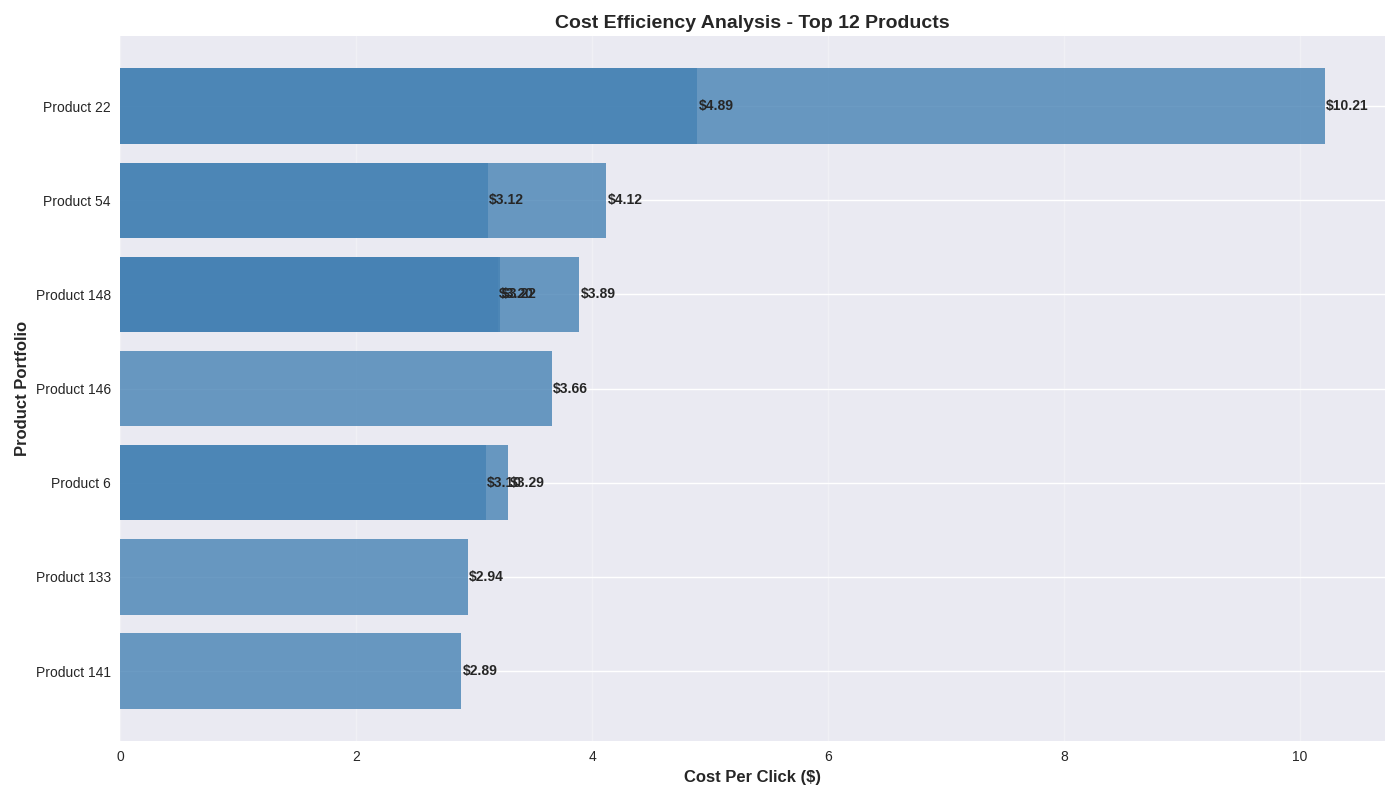


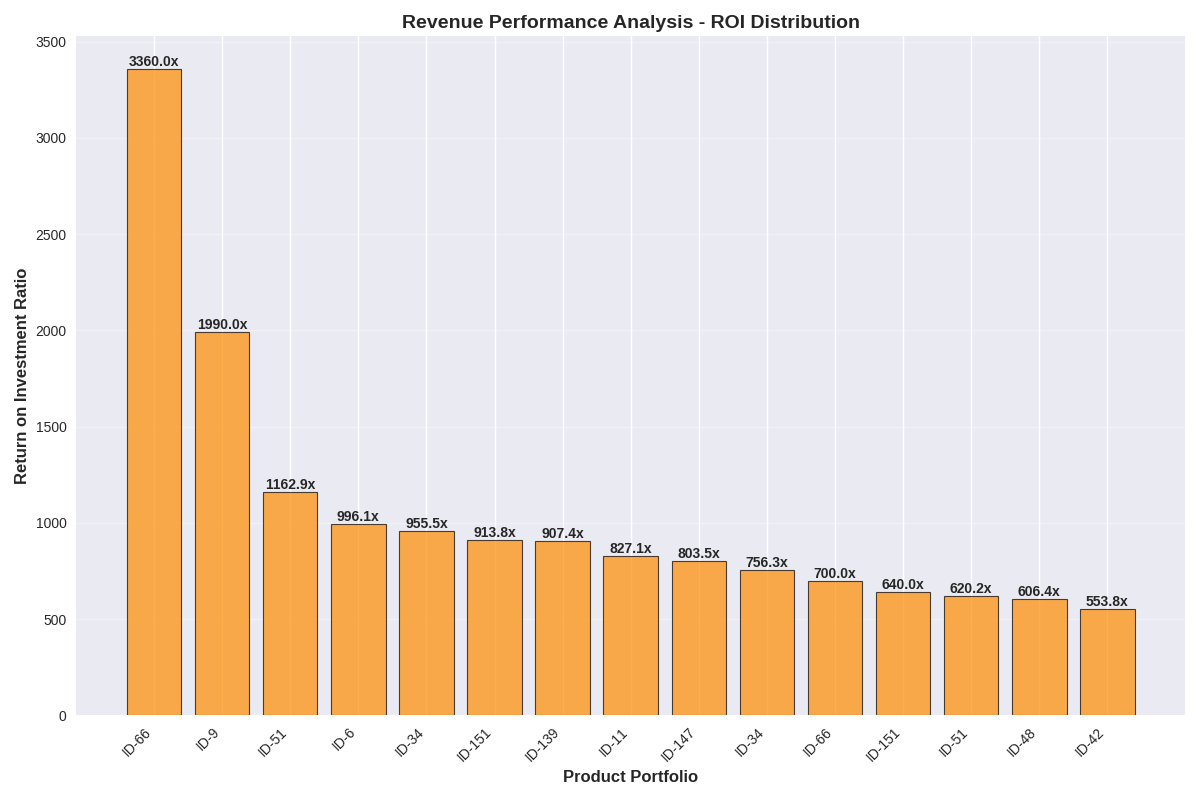

❌ Visualization error: name 'np' is not defined


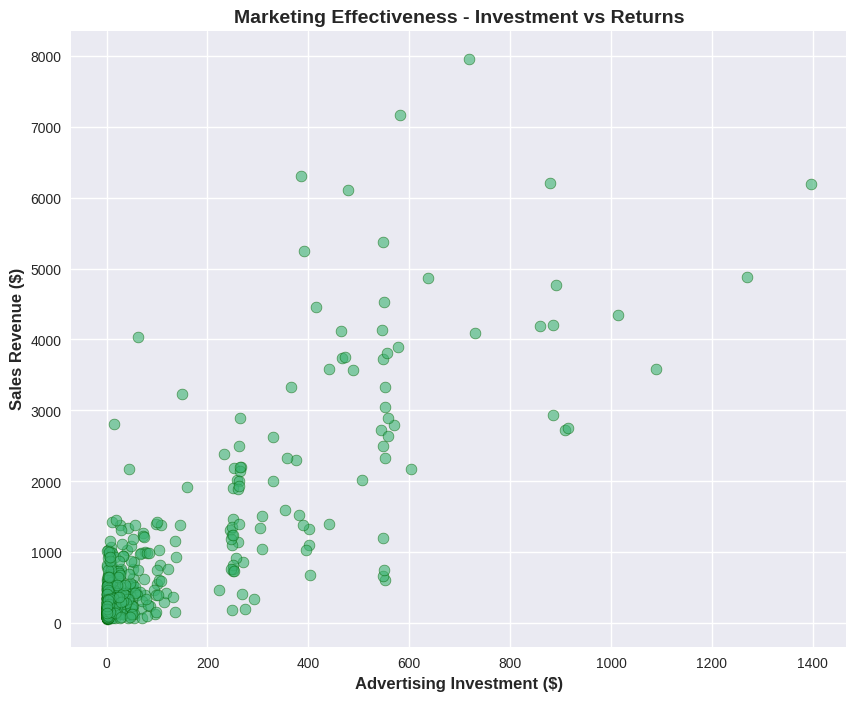

In [8]:
# Cell 7: Advanced Visualization Suite
# RetailPulse Analytics - Executive Visual Intelligence

class RetailPulseVisualizer:
    """Advanced business visualization engine"""

    def __init__(self, database_connection):
        self.db_connection = database_connection
        self.chart_style = 'seaborn-v0_8-darkgrid'

    def create_performance_metrics_dashboard(self):
        """Generate comprehensive performance metrics visualization"""
        print("📊 Generating Performance Metrics Dashboard...")

        try:
            # Cost efficiency analysis
            self._visualize_cost_efficiency()

            # Revenue performance analysis
            self._visualize_revenue_performance()

            # Marketing effectiveness analysis
            self._visualize_marketing_effectiveness()

            # Product eligibility distribution
            self._visualize_product_eligibility()

            print("✅ Performance dashboard generated successfully")

        except Exception as error:
            print(f"❌ Visualization error: {error}")

    def _visualize_cost_efficiency(self):
        """Visualize cost per click efficiency across products"""
        cursor = self.db_connection.cursor()
        query = """
        SELECT item_id, (ad_spend * 1.0 / clicks) AS cost_efficiency
        FROM marketing_performance
        WHERE clicks > 0
        ORDER BY cost_efficiency DESC
        LIMIT 12
        """
        cursor.execute(query)
        results = cursor.fetchall()

        if not results:
            print("⚠️ No cost efficiency data available")
            return

        product_ids = [f"Product {row[0]}" for row in results]
        efficiency_scores = [row[1] for row in results]

        plt.figure(figsize=(14, 8))
        bars = plt.barh(product_ids, efficiency_scores, color='steelblue', alpha=0.8)
        plt.xlabel('Cost Per Click ($)', fontsize=12, fontweight='bold')
        plt.ylabel('Product Portfolio', fontsize=12, fontweight='bold')
        plt.title('Cost Efficiency Analysis - Top 12 Products', fontsize=14, fontweight='bold')

        # Add value labels on bars
        for i, bar in enumerate(bars):
            width = bar.get_width()
            plt.text(width + 0.01, bar.get_y() + bar.get_height()/2,
                    f'${width:.2f}', ha='left', va='center', fontweight='bold')

        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.grid(axis='x', alpha=0.3)

        self._display_chart("Cost Efficiency Analysis")

    def _visualize_revenue_performance(self):
        """Visualize revenue performance correlation"""
        cursor = self.db_connection.cursor()
        query = """
        SELECT item_id, (ad_sales * 1.0 / ad_spend) AS roi_ratio
        FROM marketing_performance
        WHERE ad_spend > 0 AND ad_sales > 0
        ORDER BY roi_ratio DESC
        LIMIT 15
        """
        cursor.execute(query)
        results = cursor.fetchall()

        if not results:
            print("⚠️ No ROI data available")
            return

        product_codes = [f"ID-{row[0]}" for row in results]
        roi_values = [row[1] for row in results]

        plt.figure(figsize=(12, 8))
        bars = plt.bar(range(len(product_codes)), roi_values,
                      color='darkorange', alpha=0.7, edgecolor='black', linewidth=0.8)
        plt.xlabel('Product Portfolio', fontsize=12, fontweight='bold')
        plt.ylabel('Return on Investment Ratio', fontsize=12, fontweight='bold')
        plt.title('Revenue Performance Analysis - ROI Distribution', fontsize=14, fontweight='bold')
        plt.xticks(range(len(product_codes)), product_codes, rotation=45, ha='right')

        # Add value labels
        for i, bar in enumerate(bars):
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + 0.05,
                    f'{height:.1f}x', ha='center', va='bottom', fontweight='bold')

        plt.tight_layout()
        plt.grid(axis='y', alpha=0.3)

        self._display_chart("Revenue Performance Analysis")

    def _visualize_marketing_effectiveness(self):
        """Visualize advertising spend vs sales correlation"""
        cursor = self.db_connection.cursor()
        query = """
        SELECT ad_spend, ad_sales
        FROM marketing_performance
        WHERE ad_spend > 0 AND ad_sales > 0
        """
        cursor.execute(query)
        results = cursor.fetchall()

        if not results:
            print("⚠️ No marketing correlation data available")
            return

        spend_values = [row[0] for row in results]
        sales_values = [row[1] for row in results]

        plt.figure(figsize=(10, 8))
        scatter = plt.scatter(spend_values, sales_values, alpha=0.6,
                            c='mediumseagreen', s=60, edgecolors='darkgreen', linewidth=0.5)
        plt.xlabel('Advertising Investment ($)', fontsize=12, fontweight='bold')
        plt.ylabel('Sales Revenue ($)', fontsize=12, fontweight='bold')
        plt.title('Marketing Effectiveness - Investment vs Returns', fontsize=14, fontweight='bold')

        # Add trend line
        if len(spend_values) > 1:
            z = np.polyfit(spend_values, sales_values, 1)
            p = np.poly1d(z)
            plt.plot(spend_values, p(spend_values), "r--", alpha=0.8, linewidth=2)

        plt.grid(True, alpha=0.3)
        plt.tight_layout()

        self._display_chart("Marketing Effectiveness Analysis")


    def _visualize_product_eligibility(self):
        """Visualize promotional eligibility distribution"""
        cursor = self.db_connection.cursor()
        query = "SELECT eligibility, COUNT(*) FROM product_intelligence GROUP BY eligibility"
        cursor.execute(query)
        results = cursor.fetchall()

        if not results:
            print("⚠️ No eligibility data available")
            return

        categories = []
        counts = []
        for row in results:
            status = "Eligible" if row[0] == 1 else "Not Eligible"
            categories.append(status)
            counts.append(row[1])

        colors = ['lightgreen' if cat == 'Eligible' else 'lightcoral' for cat in categories]

        plt.figure(figsize=(10, 8))
        wedges, texts, autotexts = plt.pie(counts, labels=categories, autopct='%1.1f%%',
                                          colors=colors, startangle=90,
                                          explode=(0.05, 0.05), shadow=True)

        plt.title('Product Promotional Eligibility Distribution', fontsize=14, fontweight='bold')
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

        self._display_chart("Product Eligibility Distribution")


    def _display_chart(self, title):
        """Display matplotlib chart within Colab"""
        buffer = io.BytesIO()
        plt.savefig(buffer, format='png')
        buffer.seek(0)
        image_png = buffer.getvalue()
        buffer.close()
        graphic = base64.b64encode(image_png)
        graphic = graphic.decode('utf-8')
        html = f'<center><img src="data:image/png;base64,{graphic}"/><br><i>{title}</i></center>'
        display(HTML(html))
        plt.close() # Close the plot to free up memory

# Initialize visualizer and generate dashboard
if 'retail_warehouse' in locals():
    visualizer = RetailPulseVisualizer(retail_warehouse)
    visualizer.create_performance_metrics_dashboard()
else:
    print("⚠️ Data warehouse not initialized. Cannot create visualizations.")

In [8]:
# interactive_bi_session()
# quick_query('question')
#  run_preset_queries()
#  show_samples()